**1. DATA UNDERSTANDING & PREPROCESSING**

**Import Data**

In [83]:
import pandas as pd
import re
import unicodedata
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df = pd.read_csv("./DATASET/tweet.csv")

In [84]:
df.head()

,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...


**Distribusi Sentimen**

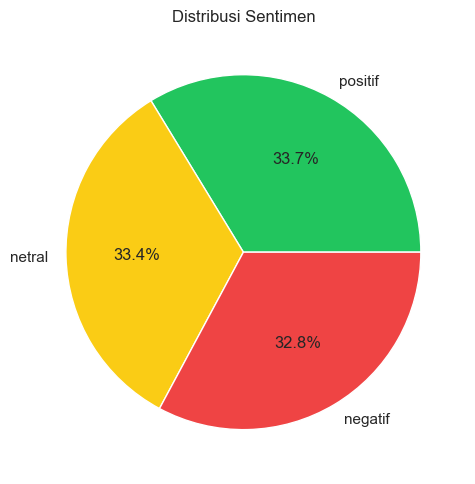

In [85]:
sns.set_theme(style="whitegrid")
sentiment_counts = df['sentimen'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        colors=['#22c55e', '#facc15', '#ef4444'])
plt.title("Distribusi Sentimen")
plt.tight_layout()
plt.show()

**Unicode Normalization**

In [86]:
#Define a normalization function
def normalize_unicode(text, form='NFKC'):
    if isinstance(text, str):
        return unicodedata.normalize(form, text)
    return text

#Apply normalization to a specific column (e.g., 'tweet')
df['normalized_tweet'] = df['tweet'].apply(lambda x: normalize_unicode(x, form='NFKC'))

#Preview the result
df[['sentimen','tweet', 'normalized_tweet']].head()

,sentimen,tweet,normalized_tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...","Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....","Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...","Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,Negara kita ngutang buat bngun infrastruktur y...


**Cleaning Tweet (REGEX)**

In [87]:
df = df.drop(columns=['Unnamed: 0'])

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\\S+|www\\S+|https\\S+", '', text)
    text = re.sub(r"@\\w+", '', text)
    text = re.sub(r"#", '', text)
    text = re.sub(r"[^\w\s]", '', text)
    text = re.sub(r"\d+", '', text)
    text = re.sub(r"\\s+", " ", text).strip()
    return text

df['clean_tweet'] = df['normalized_tweet'].astype(str).apply(clean_text)

In [88]:
df.head()

,sentimen,tweet,normalized_tweet,clean_tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,Kata @prabowo Indonesia tidak dihargai bangsa ...,kata prabowo indonesia tidak dihargai bangsa a...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...","Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batuan langka tasbih jokowi hadiah dari habib ...
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....","Di era Jokowi, ekonomi Indonesia semakin baik....",di era jokowi ekonomi indonesia semakin baik i...
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...","Bagi Sumatera Selatan, Asian Games berdampak p...",bagi sumatera selatan asian games berdampak pd...
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,Negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...


**Tweet Length Features**

In [89]:
# Tambahkan fitur panjang teks
df["char_len"] = df["clean_tweet"].apply(len)
df["word_len"] = df["clean_tweet"].apply(lambda x: len(x.split()))

# Lihat contoh
print(df.head())

  sentimen                                              tweet  \
0  negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...   
1   netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...   
2   netral  Di era Jokowi, ekonomi Indonesia semakin baik....   
3  positif  Bagi Sumatera Selatan, Asian Games berdampak p...   
4  negatif  Negara kita ngutang buat bngun infrastruktur y...   

                                    normalized_tweet  \
0  Kata @prabowo Indonesia tidak dihargai bangsa ...   
1  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...   
2  Di era Jokowi, ekonomi Indonesia semakin baik....   
3  Bagi Sumatera Selatan, Asian Games berdampak p...   
4  Negara kita ngutang buat bngun infrastruktur y...   

                                         clean_tweet  char_len  word_len  
0  kata prabowo indonesia tidak dihargai bangsa a...       156        20  
1  batuan langka tasbih jokowi hadiah dari habib ...        84        11  
2  di era jokowi ekonomi indonesia semakin baik


**WorkCloud Per Sentimen**

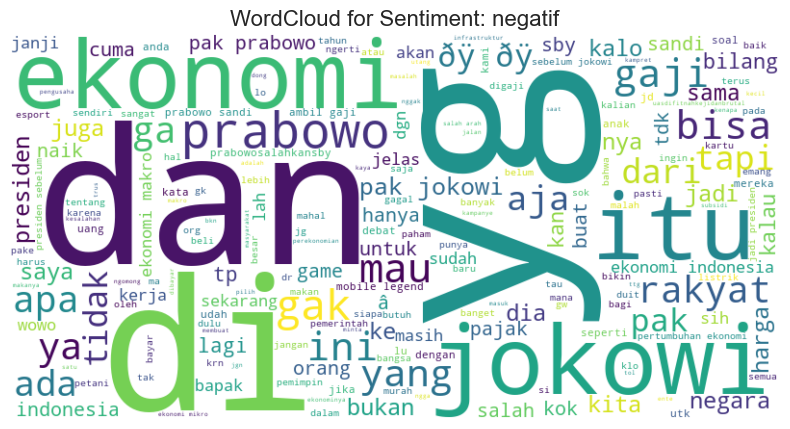

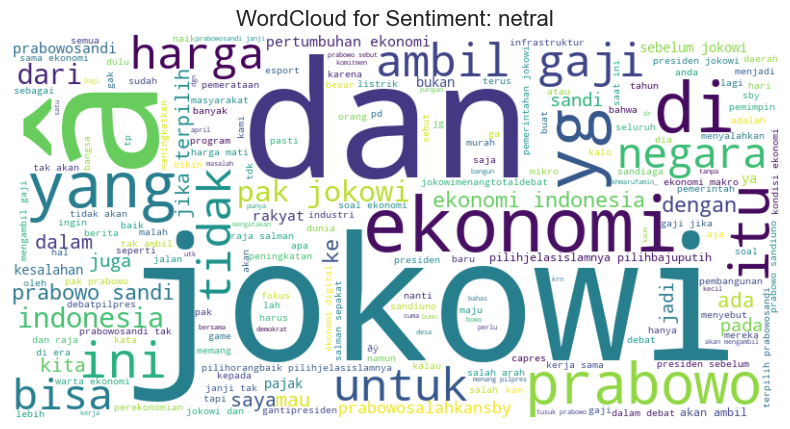

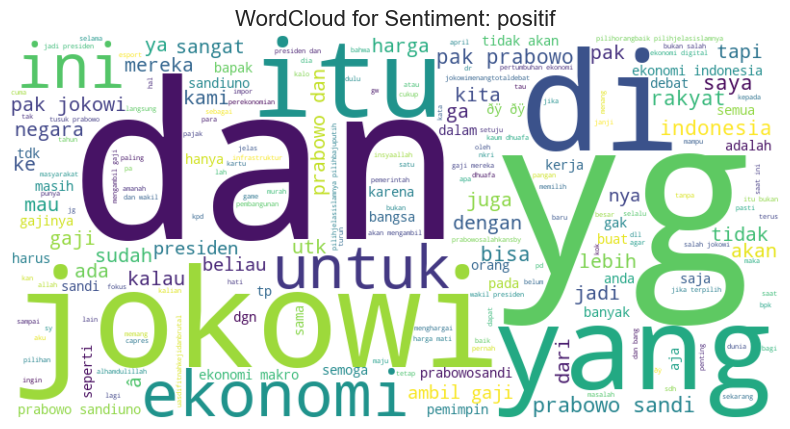

In [90]:
for label in df["sentimen"].unique():
    text = " ".join(df[df["sentimen"] == label]["clean_tweet"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for Sentiment: {label}', fontsize=16)
    plt.show()

**Plot Tweet Length Stats**

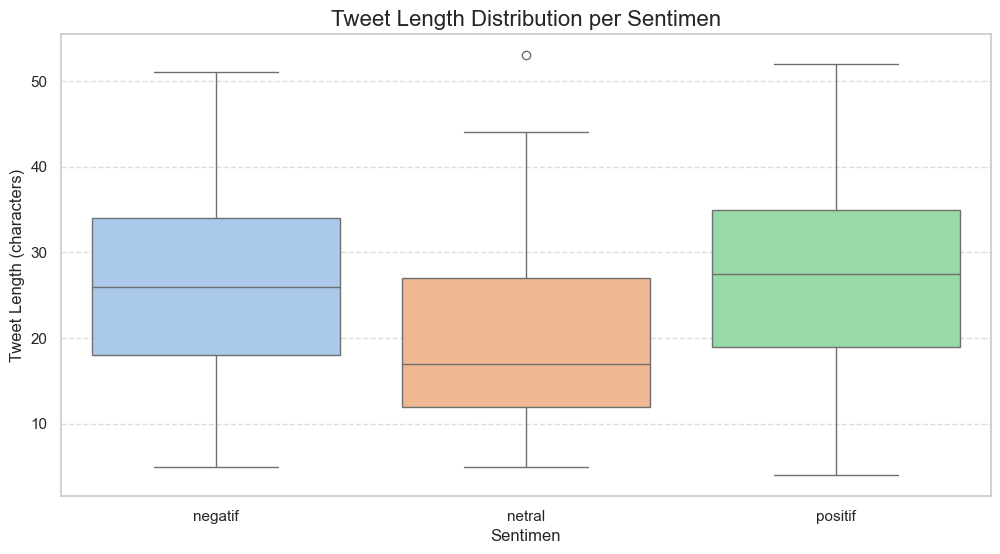

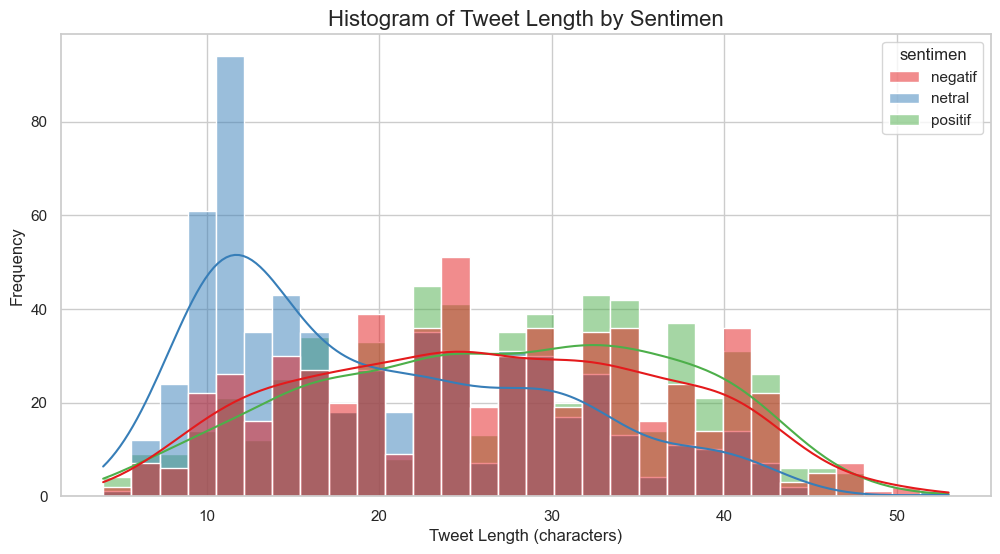

In [91]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="sentimen", y="word_len", hue="sentimen", palette="pastel", legend=False)

plt.title('Tweet Length Distribution per Sentimen', fontsize=16)
plt.xlabel('Sentimen')
plt.ylabel('Tweet Length (characters)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='word_len', hue='sentimen', bins=30, kde=True, palette='Set1')

plt.title('Histogram of Tweet Length by Sentimen', fontsize=16)
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.show()

**Top 10 Words per Sentiment**

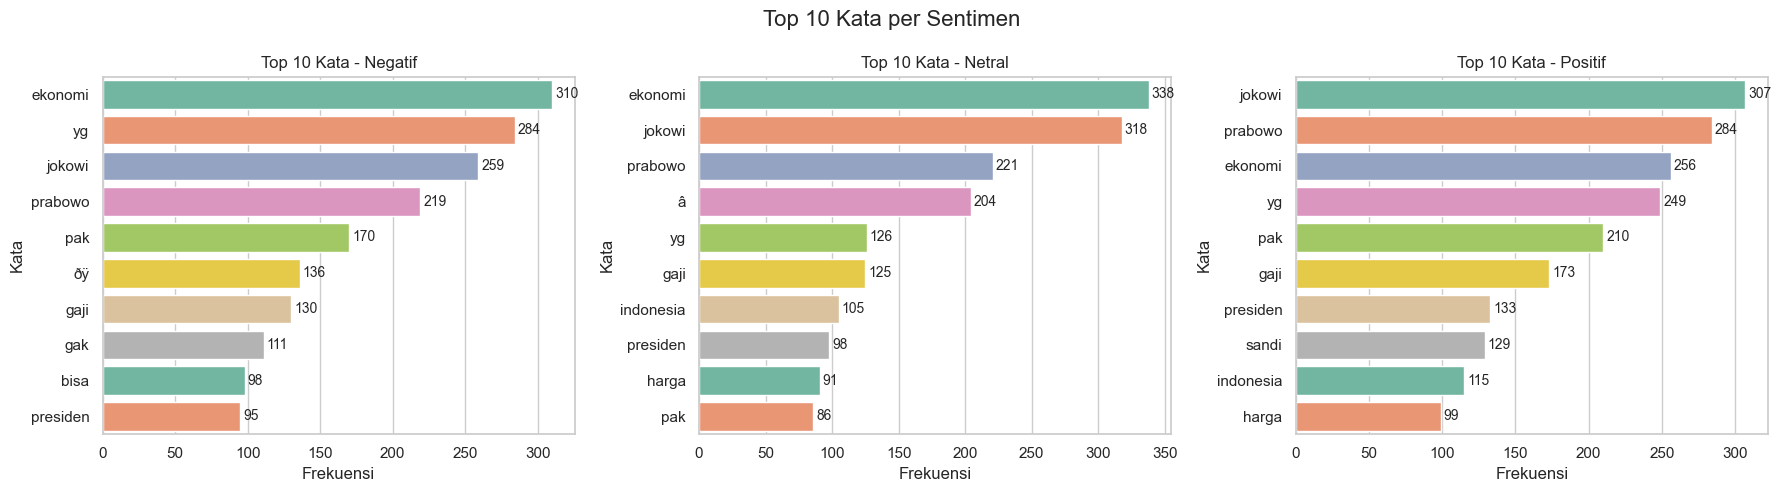

In [92]:
# Kumpulan stopword dasar (bisa diperluas)
stopwords = set([
    'yang', 'dan', 'di', 'ke', 'dari', 'ini', 'itu', 'untuk', 'dengan', 'pada',
    'karena', 'sudah', 'ada', 'jadi', 'juga', 'tidak', 'nya', 'akan', 'dalam'
])

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)
sentiments = df["sentimen"].unique()

for i, label in enumerate(sentiments):
    text = " ".join(df[df["sentimen"] == label]["clean_tweet"])
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stopwords]
    counter = Counter(filtered_tokens).most_common(10)

    top_df = pd.DataFrame(counter, columns=["word", "count"]).sort_values(by="count", ascending=False)

    sns.barplot(data=top_df, x="count", y="word", hue="word", ax=axes[i], dodge=False, palette="Set2", legend=False)

    for idx, row in top_df.iterrows():
        axes[i].text(row["count"] + 2, idx, str(row["count"]), va='center', fontsize=10)

    axes[i].set_title(f"Top 10 Kata - {label.capitalize()}")
    axes[i].set_xlabel("Frekuensi")
    axes[i].set_ylabel("Kata")

plt.suptitle("Top 10 Kata per Sentimen", fontsize=16)
plt.tight_layout()
plt.show()

Rata-rata jumlah tweet per sentimen
sentimen
netral     19.89
negatif    26.31
positif    27.10
Name: word_count, dtype: float64


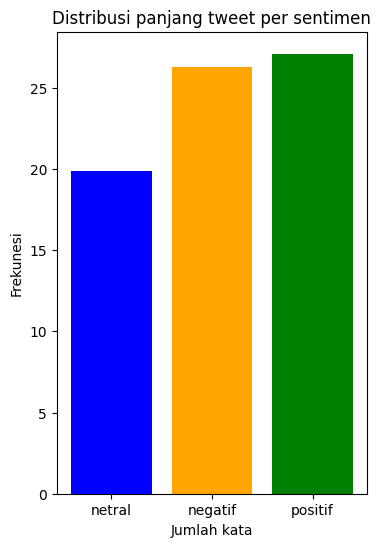

In [27]:
# Buat kolom baru untuk hitung jumlah kata dari setiap target tweet
df['word_count'] = df['clean_tweet'].dropna().apply(lambda x: len(x.split()))

avg_wordcount = df.groupby('sentimen')['word_count'].mean().round(2).sort_values(ascending=True)

print("Rata-rata jumlah tweet per sentimen")
print(avg_wordcount)

# Buat barchart
plt.figure(figsize=(4, 6))
plt.bar (avg_wordcount.index, avg_wordcount.values, color=['blue', 'orange', 'green'])
plt.title('Distribusi panjang tweet per sentimen')
plt.xlabel('Jumlah kata')
plt.ylabel('Frekunesi')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
# Ubah semua teks menjadi lowercase
df['tweet'] = df['tweet'].str.lower()
df.head()

,sentimen,tweet,normalized_tweet,clean_tweet,char_len,word_len
0,negatif,kata @prabowo indonesia tidak dihargai bangsa ...,Kata @prabowo Indonesia tidak dihargai bangsa ...,kata prabowo indonesia tidak dihargai bangsa a...,156,20
1,netral,"batuan langka, tasbih jokowi hadiah dari habib...","Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batuan langka tasbih jokowi hadiah dari habib ...,84,11
2,netral,"di era jokowi, ekonomi indonesia semakin baik....","Di era Jokowi, ekonomi Indonesia semakin baik....",di era jokowi ekonomi indonesia semakin baik i...,115,11
3,positif,"bagi sumatera selatan, asian games berdampak p...","Bagi Sumatera Selatan, Asian Games berdampak p...",bagi sumatera selatan asian games berdampak pd...,120,16
4,negatif,negara kita ngutang buat bngun infrastruktur y...,Negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...,240,34


In [93]:
import nltk

# Untuk tokenisasi
nltk.download('punkt')  
nltk.download('punkt_tab')

# Untuk stopwords
nltk.download('stopwords')   

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/developeryacoon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/developeryacoon/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/developeryacoon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
df['tweet'] = df['tweet'].str.lower()
df['tweet_tokenized'] = df['tweet'].apply(word_tokenize)
df[['tweet','clean_tweet','tweet_tokenized']].head()

,tweet,clean_tweet,tweet_tokenized
0,kata @prabowo indonesia tidak dihargai bangsa ...,kata prabowo indonesia tidak dihargai bangsa a...,"[kata, @, prabowo, indonesia, tidak, dihargai,..."
1,"batuan langka, tasbih jokowi hadiah dari habib...",batuan langka tasbih jokowi hadiah dari habib ...,"[batuan, langka, ,, tasbih, jokowi, hadiah, da..."
2,"di era jokowi, ekonomi indonesia semakin baik....",di era jokowi ekonomi indonesia semakin baik i...,"[di, era, jokowi, ,, ekonomi, indonesia, semak..."
3,"bagi sumatera selatan, asian games berdampak p...",bagi sumatera selatan asian games berdampak pd...,"[bagi, sumatera, selatan, ,, asian, games, ber..."
4,negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...,"[negara, kita, ngutang, buat, bngun, infrastru..."


In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))
df['tweet_no_stopwords'] = df['tweet_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
df[['tweet','clean_tweet','tweet_tokenized','tweet_no_stopwords']].head()

,tweet,clean_tweet,tweet_tokenized,tweet_no_stopwords
0,kata @prabowo indonesia tidak dihargai bangsa ...,kata prabowo indonesia tidak dihargai bangsa a...,"[kata, @, prabowo, indonesia, tidak, dihargai,...","[@, prabowo, indonesia, dihargai, bangsa, asin..."
1,"batuan langka, tasbih jokowi hadiah dari habib...",batuan langka tasbih jokowi hadiah dari habib ...,"[batuan, langka, ,, tasbih, jokowi, hadiah, da...","[batuan, langka, ,, tasbih, jokowi, hadiah, ha..."
2,"di era jokowi, ekonomi indonesia semakin baik....",di era jokowi ekonomi indonesia semakin baik i...,"[di, era, jokowi, ,, ekonomi, indonesia, semak...","[era, jokowi, ,, ekonomi, indonesia, ., #, 01i..."
3,"bagi sumatera selatan, asian games berdampak p...",bagi sumatera selatan asian games berdampak pd...,"[bagi, sumatera, selatan, ,, asian, games, ber...","[sumatera, selatan, ,, asian, games, berdampak..."
4,negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...,"[negara, kita, ngutang, buat, bngun, infrastru...","[negara, ngutang, bngun, infrastruktur, udah, ..."


**STEMMING (SASTRAWI)**

In [18]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['tweet_stemmed'] = df['tweet_no_stopwords'].apply(lambda x: [stemmer.stem(word) for word in x])

In [20]:
df.head()

,sentimen,tweet,normalized_tweet,clean_tweet,char_len,word_len,tweet_tokenized,tweet_no_stopwords,tweet_stemmed
0,negatif,kata @prabowo indonesia tidak dihargai bangsa ...,Kata @prabowo Indonesia tidak dihargai bangsa ...,kata prabowo indonesia tidak dihargai bangsa a...,156,20,"[kata, @, prabowo, indonesia, tidak, dihargai,...","[@, prabowo, indonesia, dihargai, bangsa, asin...","[, prabowo, indonesia, harga, bangsa, asing, ,..."
1,netral,"batuan langka, tasbih jokowi hadiah dari habib...","Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batuan langka tasbih jokowi hadiah dari habib ...,84,11,"[batuan, langka, ,, tasbih, jokowi, hadiah, da...","[batuan, langka, ,, tasbih, jokowi, hadiah, ha...","[batu, langka, , tasbih, jokowi, hadiah, habib..."
2,netral,"di era jokowi, ekonomi indonesia semakin baik....","Di era Jokowi, ekonomi Indonesia semakin baik....",di era jokowi ekonomi indonesia semakin baik i...,115,11,"[di, era, jokowi, ,, ekonomi, indonesia, semak...","[era, jokowi, ,, ekonomi, indonesia, ., #, 01i...","[era, jokowi, , ekonomi, indonesia, , , 01indo..."
3,positif,"bagi sumatera selatan, asian games berdampak p...","Bagi Sumatera Selatan, Asian Games berdampak p...",bagi sumatera selatan asian games berdampak pd...,120,16,"[bagi, sumatera, selatan, ,, asian, games, ber...","[sumatera, selatan, ,, asian, games, berdampak...","[sumatera, selatan, , asi, games, dampak, pd, ..."
4,negatif,negara kita ngutang buat bngun infrastruktur y...,Negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...,240,34,"[negara, kita, ngutang, buat, bngun, infrastru...","[negara, ngutang, bngun, infrastruktur, udah, ...","[negara, ngutang, bngun, infrastruktur, udah, ..."


In [24]:
df['tweet_process'] = df['tweet_stemmed'].apply(lambda x: ' '.join(x))
print(df['tweet_process'].head())

0     prabowo indonesia harga bangsa asing  berita ...
1    batu langka  tasbih jokowi hadiah habib luthfi...
2    era jokowi  ekonomi indonesia   01indonesiamaj...
3    sumatera selatan  asi games dampak pd ekonomi ...
4    negara ngutang bngun infrastruktur udah dipake...
Name: tweet_process, dtype: object


**TEXT VEXTORIZATION**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['tweet_process'])
print('Shape TF-IDF: ', X.shape)

Shape TF-IDF:  (1815, 6417)


In [26]:
# Cek distribusi sentimen
df['sentimen'].value_counts()

sentimen
positif    612
netral     607
negatif    596
Name: count, dtype: int64

In [29]:
df.to_csv('./DATASET/tweet_preprocess.csv', index=False)
print('Data disimpan ke "/DATASET/tweet_preprocess.csv"')

Data disimpan ke "/DATASET/tweet_preprocess.csv"


**MODEL TRAINING & EVALUATION**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from collections import Counter   # Untuk menghitung frekuensi kata
from wordcloud import WordCloud 

2025-06-04 04:40:27.616690: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('./DATASET/tweet_preprocess.csv')
df.head()

,sentimen,tweet,normalized_tweet,clean_tweet,char_len,word_len,tweet_tokenized,tweet_no_stopwords,tweet_stemmed,tweet_process
0,negatif,kata @prabowo indonesia tidak dihargai bangsa ...,Kata @prabowo Indonesia tidak dihargai bangsa ...,kata prabowo indonesia tidak dihargai bangsa a...,156,20,"['kata', '@', 'prabowo', 'indonesia', 'tidak',...","['@', 'prabowo', 'indonesia', 'dihargai', 'ban...","['', 'prabowo', 'indonesia', 'harga', 'bangsa'...",prabowo indonesia harga bangsa asing berita ...
1,netral,"batuan langka, tasbih jokowi hadiah dari habib...","Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batuan langka tasbih jokowi hadiah dari habib ...,84,11,"['batuan', 'langka', ',', 'tasbih', 'jokowi', ...","['batuan', 'langka', ',', 'tasbih', 'jokowi', ...","['batu', 'langka', '', 'tasbih', 'jokowi', 'ha...",batu langka tasbih jokowi hadiah habib luthfi...
2,netral,"di era jokowi, ekonomi indonesia semakin baik....","Di era Jokowi, ekonomi Indonesia semakin baik....",di era jokowi ekonomi indonesia semakin baik i...,115,11,"['di', 'era', 'jokowi', ',', 'ekonomi', 'indon...","['era', 'jokowi', ',', 'ekonomi', 'indonesia',...","['era', 'jokowi', '', 'ekonomi', 'indonesia', ...",era jokowi ekonomi indonesia 01indonesiamaj...
3,positif,"bagi sumatera selatan, asian games berdampak p...","Bagi Sumatera Selatan, Asian Games berdampak p...",bagi sumatera selatan asian games berdampak pd...,120,16,"['bagi', 'sumatera', 'selatan', ',', 'asian', ...","['sumatera', 'selatan', ',', 'asian', 'games',...","['sumatera', 'selatan', '', 'asi', 'games', 'd...",sumatera selatan asi games dampak pd ekonomi ...
4,negatif,negara kita ngutang buat bngun infrastruktur y...,Negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...,240,34,"['negara', 'kita', 'ngutang', 'buat', 'bngun',...","['negara', 'ngutang', 'bngun', 'infrastruktur'...","['negara', 'ngutang', 'bngun', 'infrastruktur'...",negara ngutang bngun infrastruktur udah dipake...


In [14]:
# Buat variabel label fitur dan target
X_text = df['tweet_process'].fillna('')
y = df['sentimen']

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(X_text)
print('Shape TF-IDF matrix:', X.shape)

Shape TF-IDF matrix: (1815, 3000)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Jumlah data train : ', X_train.shape[0])
print('Jumlah data test : ', X_test.shape[0])

Jumlah data train :  1452
Jumlah data test :  363


**Traditional Mechine Learning : Logistic Regression**

In [16]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred)
print("Akurasi :", accuracy_score(y_test, y_pred))
print("Hasil :\n", classification_report(y_test, y_pred))

Akurasi : 0.6253443526170799
Hasil :
               precision    recall  f1-score   support

     negatif       0.63      0.73      0.68       117
      netral       0.65      0.53      0.58       127
     positif       0.60      0.63      0.61       119

    accuracy                           0.63       363
   macro avg       0.63      0.63      0.62       363
weighted avg       0.63      0.63      0.62       363



In [17]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['lbfgs', 'liblinear'], 
    'penalty': ['l2'],
    'class_weight': ['balanced', None]
    }
grid_lr = GridSearchCV(LogisticRegression(max_iter=3000),
                    param_grid_lr, cv=5,
                    scoring='accuracy')
grid_lr.fit(X_train, y_train)
print("Parameter terbaik:", grid_lr.best_params_)
print("Akurasi terbaik:", grid_lr.best_score_)
best_acc_lr = grid_lr.best_score_

Parameter terbaik: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Akurasi terbaik: 0.6322336769759451


**SVM**

In [31]:
svm_model = SVC(kernel='linear', random_state=1)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", acc_svm)
print("SVM Report:\n", classification_report(y_test, y_pred))

SVM Accuracy: 0.6143250688705234
SVM Report:
               precision    recall  f1-score   support

     negatif       0.59      0.76      0.67       117
      netral       0.68      0.49      0.57       127
     positif       0.59      0.61      0.60       119

    accuracy                           0.61       363
   macro avg       0.62      0.62      0.61       363
weighted avg       0.62      0.61      0.61       363



In [34]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
    }
grid_svm = GridSearchCV(SVC(kernel='linear', random_state=1),
                    param_grid_svm, cv=5,
                    scoring='accuracy')
grid_svm.fit(X_train, y_train)
print("Parameter terbaik:", grid_svm.best_params_)
print("Akurasi terbaik:", grid_svm.best_score_)
best_acc_svm = grid_svm.best_score_

Parameter terbaik: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Akurasi terbaik: 0.6322431567721294


**Random Forest**

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", acc_rf)
print("Random Forest Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 0.5537190082644629
Random Forest Report:
               precision    recall  f1-score   support

     negatif       0.54      0.68      0.60       117
      netral       0.58      0.46      0.51       127
     positif       0.55      0.54      0.54       119

    accuracy                           0.55       363
   macro avg       0.56      0.56      0.55       363
weighted avg       0.56      0.55      0.55       363



**DEEP LEARNING : NAIVE BAYES**

In [21]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", acc_nb)
print("Naive Bayes Report:\n", classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.6198347107438017
Naive Bayes Report:
               precision    recall  f1-score   support

     negatif       0.68      0.70      0.69       117
      netral       0.66      0.47      0.55       127
     positif       0.55      0.70      0.61       119

    accuracy                           0.62       363
   macro avg       0.63      0.62      0.62       363
weighted avg       0.63      0.62      0.62       363



In [22]:
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 5.0],
    'fit_prior': [True, False]
    }
grid_nb = GridSearchCV(MultinomialNB(),
                    param_grid_nb, cv=5,
                    scoring='accuracy')
grid_nb.fit(X_train, y_train)
print("Parameter terbaik:", grid_nb.best_params_)
print("Akurasi terbaik:", grid_nb.best_score_)
best_acc_nb = grid_nb.best_score_

Parameter terbaik: {'alpha': 0.5, 'fit_prior': False}
Akurasi terbaik: 0.6267116956985426


**PERBANDINGAN AKURASI MODEL**

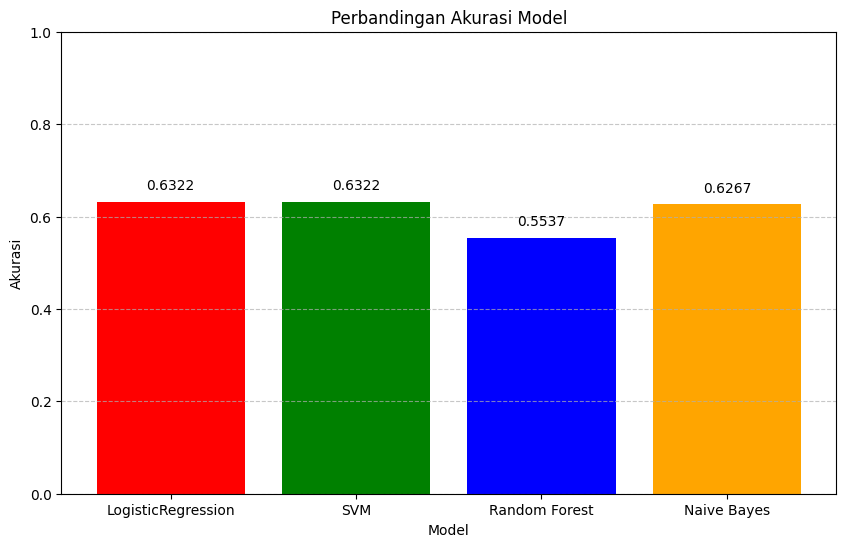

In [23]:
model_names = ['LogisticRegression', 'SVM', 'Random Forest', 'Naive Bayes']
accuracies = [best_acc_lr, best_acc_svm, acc_rf, best_acc_nb]

plt.figure(figsize=(10,6))
bars = plt.bar(model_names, accuracies, color=['red', 'green', 'blue', 'orange'])
plt.ylim([0, 1])
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{acc:.4f}', ha='center', va='bottom')

plt.show()

**CONFUSION MATRIX**

In [25]:
y_pred_lr = grid_lr.best_estimator_.predict(X_test)
y_pred_nb = grid_nb.best_estimator_.predict(X_test)
y_pred_svm = grid_svm.best_estimator_.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

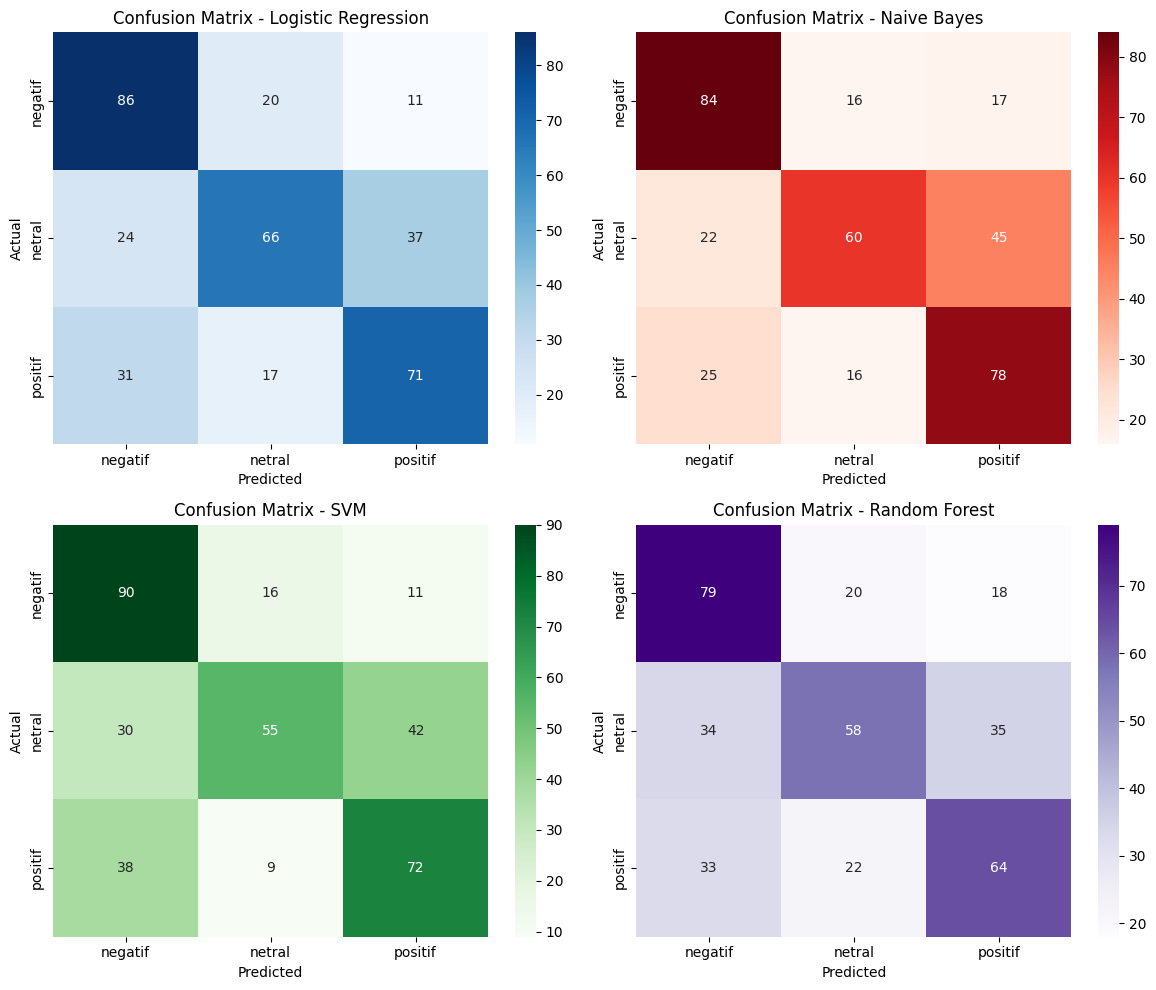

In [26]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_rf = confusion_matrix(y_test, y_pred_rf)


labels = ['negatif', 'netral', 'positif']

# Buat 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# plt.figure(figsize=(12, 5))

# Logistic Regression
# plt.subplot(1, 2, 1)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axs[0, 0])
axs[0, 0].set_title("Confusion Matrix - Logistic Regression")
axs[0, 0].set_xlabel("Predicted")
axs[0, 0].set_ylabel("Actual")

# Naive Bayes
# plt.subplot(1, 2, 2)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Reds',
            xticklabels=labels, yticklabels=labels, ax=axs[0, 1])
axs[0, 1].set_title("Confusion Matrix - Naive Bayes")
axs[0, 1].set_xlabel("Predicted")
axs[0, 1].set_ylabel("Actual")

# SVM
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels, ax=axs[1, 0])
axs[1, 0].set_title("Confusion Matrix - SVM")
axs[1, 0].set_xlabel("Predicted")
axs[1, 0].set_ylabel("Actual")

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=labels, yticklabels=labels, ax=axs[1, 1])
axs[1, 1].set_title("Confusion Matrix - Random Forest")
axs[1, 1].set_xlabel("Predicted")
axs[1, 1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

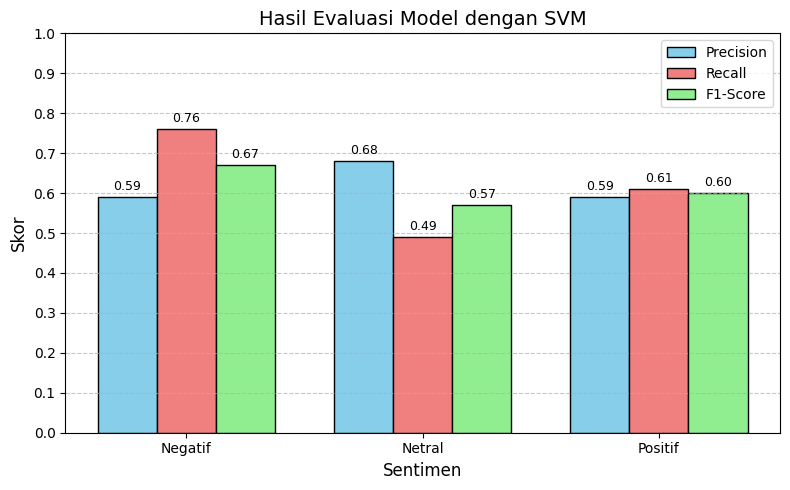

In [36]:
# Data hasil SVM
sentimen = ['Negatif', 'Netral', 'Positif']
precision = [0.59, 0.68, 0.59]
recall = [0.76, 0.49, 0.61]
f1_score = [0.67, 0.57, 0.60]

# Setup untuk bar chart
x = np.arange(len(sentimen))
width = 0.25

# Buat figure dan axes
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_ylim(0.0, 1.0)
ax.set_yticks(np.arange(0.0, 1.1, 0.1))

# Buat bar chart
bar1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue', edgecolor='black')
bar2 = ax.bar(x, recall, width, label='Recall', color='lightcoral', edgecolor='black')
bar3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='lightgreen', edgecolor='black')

# Tambah label dan judul
ax.set_xlabel('Sentimen', fontsize=12)
ax.set_ylabel('Skor', fontsize=12)
ax.set_title('Hasil Evaluasi Model dengan SVM', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(sentimen, fontsize=10)

# Tambah value di bar
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', 
                ha='center', va='bottom', fontsize=9)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend(fontsize=10)
plt.tight_layout()

plt.show()

In [38]:
print('Akurasi terbaik:', best_acc_svm)

Akurasi terbaik: 0.6322431567721294
